# Pyber Data Analysis
* The average rate is higher in Rural but the history shows that there are more rides in Urban with lower average rate.
* There exists and important market to explore within the Suburban cities, even though Urban is the most profitable, with the correct marketing campaign, the target could be leverage with this sector. 
* There could be an strategy to have a margin of applicable discounts for the Urban type, in order to claim more of the share market that could be balance with the number of rides.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
CityDataToLoad = "data/city_data.csv"
RideDataToLoad = "data/ride_data.csv"

# Read the City and Ride Data
City = pd.read_csv(CityDataToLoad, encoding="ISO-8859-1")
Ride = pd.read_csv(RideDataToLoad, encoding="ISO-8859-1")

# Combine/Merge the Two DataFrames Into a Single Dataset Based on the Cities They Share
PyberDf = pd.merge(Ride, City, on="city", how="left")

# Display Data Table for Preview
PyberDf.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

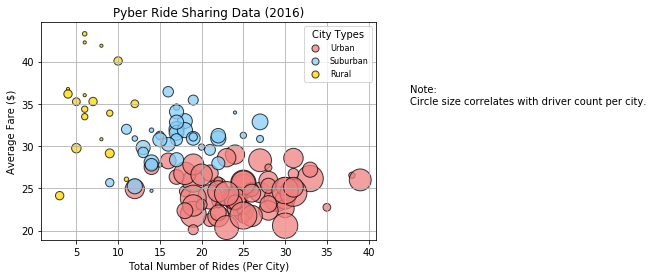

In [7]:
#Obtain all data to calculate
# Urban
# Fare / # of Rides and Total of driver per city
UAveFare = PyberDf[PyberDf["type"] == "Urban"].groupby("city").fare.mean()
URideTot = PyberDf[PyberDf["type"] == "Urban"].groupby("city").ride_id.count()
UDrivTot = PyberDf[PyberDf["type"] == "Urban"].groupby("city").driver_count.mean()

# SubUrban
# Fare / # of Rides and Total of driver per city
SAveFare = PyberDf[PyberDf["type"] == "Suburban"].groupby("city").fare.mean()
SRideTot = PyberDf[PyberDf["type"] == "Suburban"].groupby("city").ride_id.count()
SDrivTot = PyberDf[PyberDf["type"] == "Suburban"].groupby("city").driver_count.mean()

# Rural
# Fare / # of Rides and Total of driver per city
RAveFare = PyberDf[PyberDf["type"] == "Rural"].groupby("city").fare.mean()
RRideTot = PyberDf[PyberDf["type"] == "Rural"].groupby("city").ride_id.count()
RDrivTot = PyberDf[PyberDf["type"] == "Rural"].groupby("city").driver_count.mean()

# Obtain the x and y coordinates for each of the three city types
#Urban
UxAx = UAveFare
UyAx = URideTot
UzAx = UDrivTot

#Suburban
SxAx = SAveFare
SyAx = SRideTot
SzAx = SDrivTot

#Rural
RxAx = RAveFare
RyAx = RRideTot
RzAx = RDrivTot

# Build the scatter plots for each city types
UBubble = plt.scatter(UyAx, UxAx, s=UzAx*10, marker="o", facecolors="LightCoral", edgecolors="black", alpha=0.75, label="Urban")
SBubble = plt.scatter(SyAx, SxAx, s=SzAx*10, marker="o", facecolors="LightSkyBlue", edgecolors="black", alpha=0.75, label="Suburban")
RBubble = plt.scatter(RyAx, RxAx, s=RzAx*10, marker="o", facecolors="Gold", edgecolors="black", alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
Lege = plt.legend(handles=[UBubble, SBubble, RBubble], title="City Types", fontsize=8, loc="best") 
Lege.legendHandles[0]._sizes = [50]
Lege.legendHandles[1]._sizes = [50]
Lege.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(45,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("./Pyber_Solved_Bubble.png")

## Total Fares by City Type

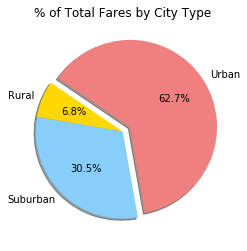

In [3]:
# We need to get the total of fares
TotalSetFares = PyberDf.fare.sum()

UFarePer = PyberDf[PyberDf["type"] == "Urban"].fare.sum() / TotalSetFares * 100
SFarePer = PyberDf[PyberDf["type"] == "Suburban"].fare.sum() / TotalSetFares * 100
RFarePer = PyberDf[PyberDf["type"] == "Rural"].fare.sum() / TotalSetFares * 100

# Build Pie Chart
plt.title("% of Total Fares by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [UFarePer, RFarePer, SFarePer]
colors = ["LightCoral", "Gold", "LightSkyBlue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure
plt.savefig("./Pyber_Solved_Pie_Fare.png")

# Show Figure
plt.show()

## Total Rides by City Type

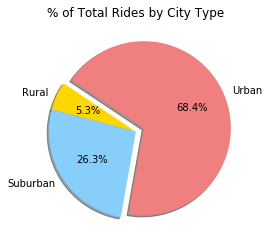

In [4]:
# Calculate Ride Percents
TotalSetRides = PyberDf.ride_id.count()

URidePer = PyberDf[PyberDf["type"] == "Urban"].ride_id.count() / TotalSetRides * 100
SRidePer = PyberDf[PyberDf["type"] == "Suburban"].ride_id.count() / TotalSetRides * 100
RRidePer = PyberDf[PyberDf["type"] == "Rural"].ride_id.count() / TotalSetRides * 100

# Build Pie Chart
plt.title("% of Total Rides by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [URidePer, RRidePer, SRidePer]
colors = ["LightCoral", "Gold", "LightSkyBlue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=260)

# Save Figure
plt.savefig("./Pyber_Solved_Pie_Ride.png")

plt.show()

## Total Drivers by City Type

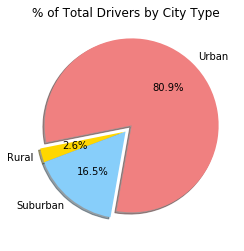

In [5]:
# Calculate Driver Percents
TotalSetDrivers = City.driver_count.sum()

UDrivPer = City[City["type"] == "Urban"].driver_count.sum() / TotalSetDrivers * 100
SDrivPer = City[City["type"] == "Suburban"].driver_count.sum() / TotalSetDrivers * 100
RDrivPer = City[City["type"] == "Rural"].driver_count.sum() / TotalSetDrivers * 100

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [UDrivPer, RDrivPer, SDrivPer ]
colors = ["LightCoral", "Gold", "LightSkyBlue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=260)

# Save Figure
plt.savefig("./Pyber_Solved_Pie_Driver.png")

plt.show()